In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# local python scripts package
from utils import cleanup
from utils import plots
from utils.plots import PlotType

# setup logging level
logging.getLogger().setLevel(logging.DEBUG)

In [2]:
# import dataset
data = pd.read_csv("../dataset/king_country_houses_aa.csv")
df = data.copy()
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# create instance of Auto EDA class
eda_utils = cleanup.Auto_EDA(df)

In [4]:
logging.info(f"Number of rows before cleanup: {eda_utils.init_rows}")
eda_utils.auto_cleanup()
logging.info(f"Number of rows after cleanup: {eda_utils.count_rows()}")

INFO:root:Number of rows before cleanup: 21613
INFO:root:Dataset has no empty spaces.
INFO:root:Dataset has no duplicates.
INFO:root:Number of rows after cleanup: 21613


In [5]:
df_nulls = eda_utils.count_nulls()
print(df_nulls)

               is_na  not_na  na_percent na_percent_pretty
id                 0   21613         0.0             0.00%
date               0   21613         0.0             0.00%
price              0   21613         0.0             0.00%
bedrooms           0   21613         0.0             0.00%
bathrooms          0   21613         0.0             0.00%
sqft_living        0   21613         0.0             0.00%
sqft_lot           0   21613         0.0             0.00%
floors             0   21613         0.0             0.00%
waterfront         0   21613         0.0             0.00%
view               0   21613         0.0             0.00%
condition          0   21613         0.0             0.00%
grade              0   21613         0.0             0.00%
sqft_above         0   21613         0.0             0.00%
sqft_basement      0   21613         0.0             0.00%
yr_built           0   21613         0.0             0.00%
yr_renovated       0   21613         0.0             0.0

In [6]:
eda_utils.print_eda_report()

================= Dataset =================
Dataset has shape (21613, 21)

Dataset has numerical data in columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
- Column "id" has 21436 unique values.
- Column "sqft_lot" has 9782 unique values.
- Column "sqft_lot15" has 8689 unique values.
- Column "lat" has 5034 unique values.
- Column "price" has 4028 unique values.
- Column "sqft_living" has 1038 unique values.
- Column "sqft_above" has 946 unique values.
- Column "sqft_living15" has 777 unique values.
- Column "long" has 752 unique values.
- Column "sqft_basement" has 306 unique values.
- Column "yr_built" has 116 unique values.
- Column "yr_renovated" has 70 unique values.
- Column "zipcode" has 70 unique values.
- Column "bathrooms" has 30 unique values.
- Column "bedrooms" has 13 unique value

In [7]:
numerical_cols = eda_utils.get_numerical_columns()

In [8]:
# initiate a new instance of plots class 
# set color palette and theme for maximum of colors set to columns count
plots = plots.Gryffindor_plots(n_columns=df.shape[1], target_column='price')

In [11]:
descrete_columns = []
descrete_columns.append('price')
descrete_columns.append('view')
descrete_columns.append('bedrooms')
descrete_columns.append('bathrooms')
descrete_columns.append('floors')
descrete_columns.append('zipcode')
descrete_columns.append('yr_built')
descrete_columns.append('yr_renovated')
print(descrete_columns)

['price', 'view', 'bedrooms', 'bathrooms', 'floors', 'zipcode', 'yr_built', 'yr_renovated']


In [12]:
continuous_columns = []
continuous_columns.append('price')
continuous_columns.append('sqft_lot')
continuous_columns.append('sqft_lot15')
continuous_columns.append('sqft_above')
continuous_columns.append('sqft_basement')
continuous_columns.append('sqft_living')
continuous_columns.append('lat')
continuous_columns.append('long')
print(continuous_columns)

['price', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'sqft_living', 'lat', 'long']


In [13]:
categorical_columns = []
categorical_columns.append('date') # questionable
categorical_columns.append('id')
categorical_columns.append('waterfront')
categorical_columns.append('grade')
categorical_columns.append('condition')
print(categorical_columns)

['date', 'id', 'waterfront', 'grade', 'condition']


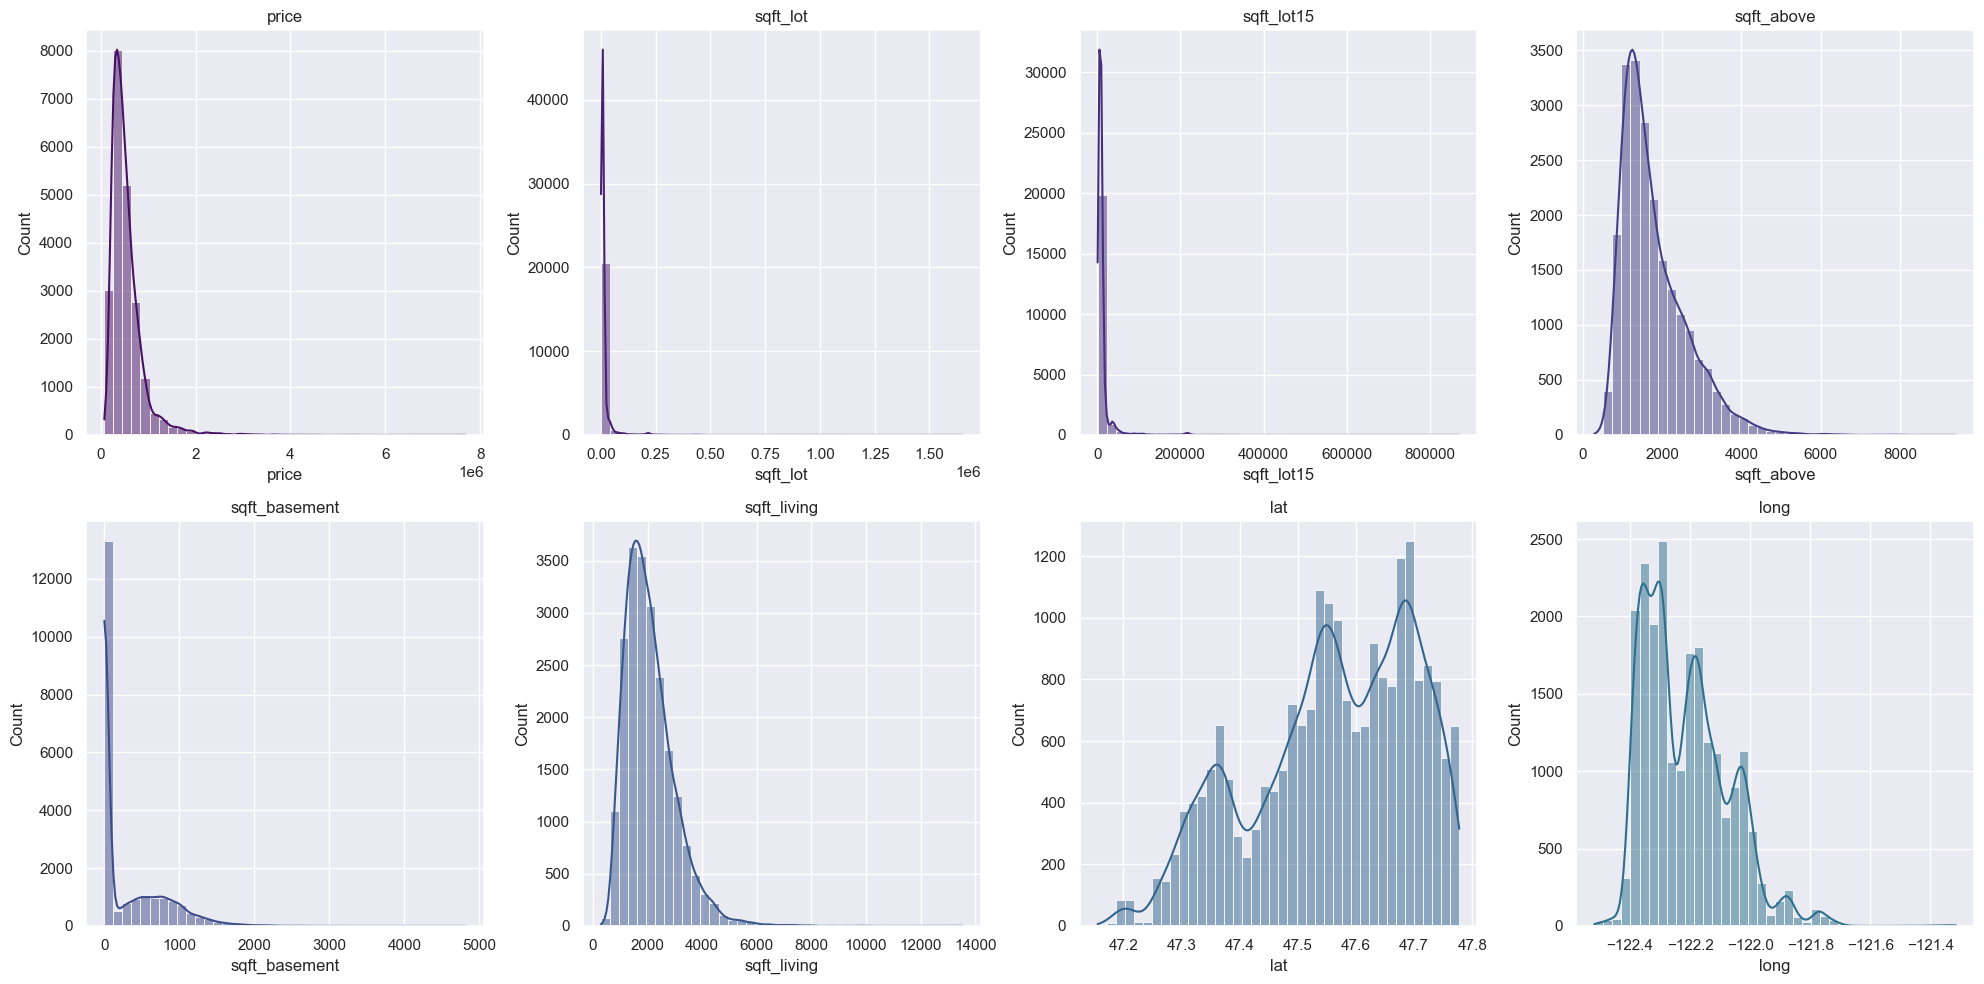

In [14]:
plots.plots_for_columns(df, continuous_columns, PlotType.HISTOGRAM)

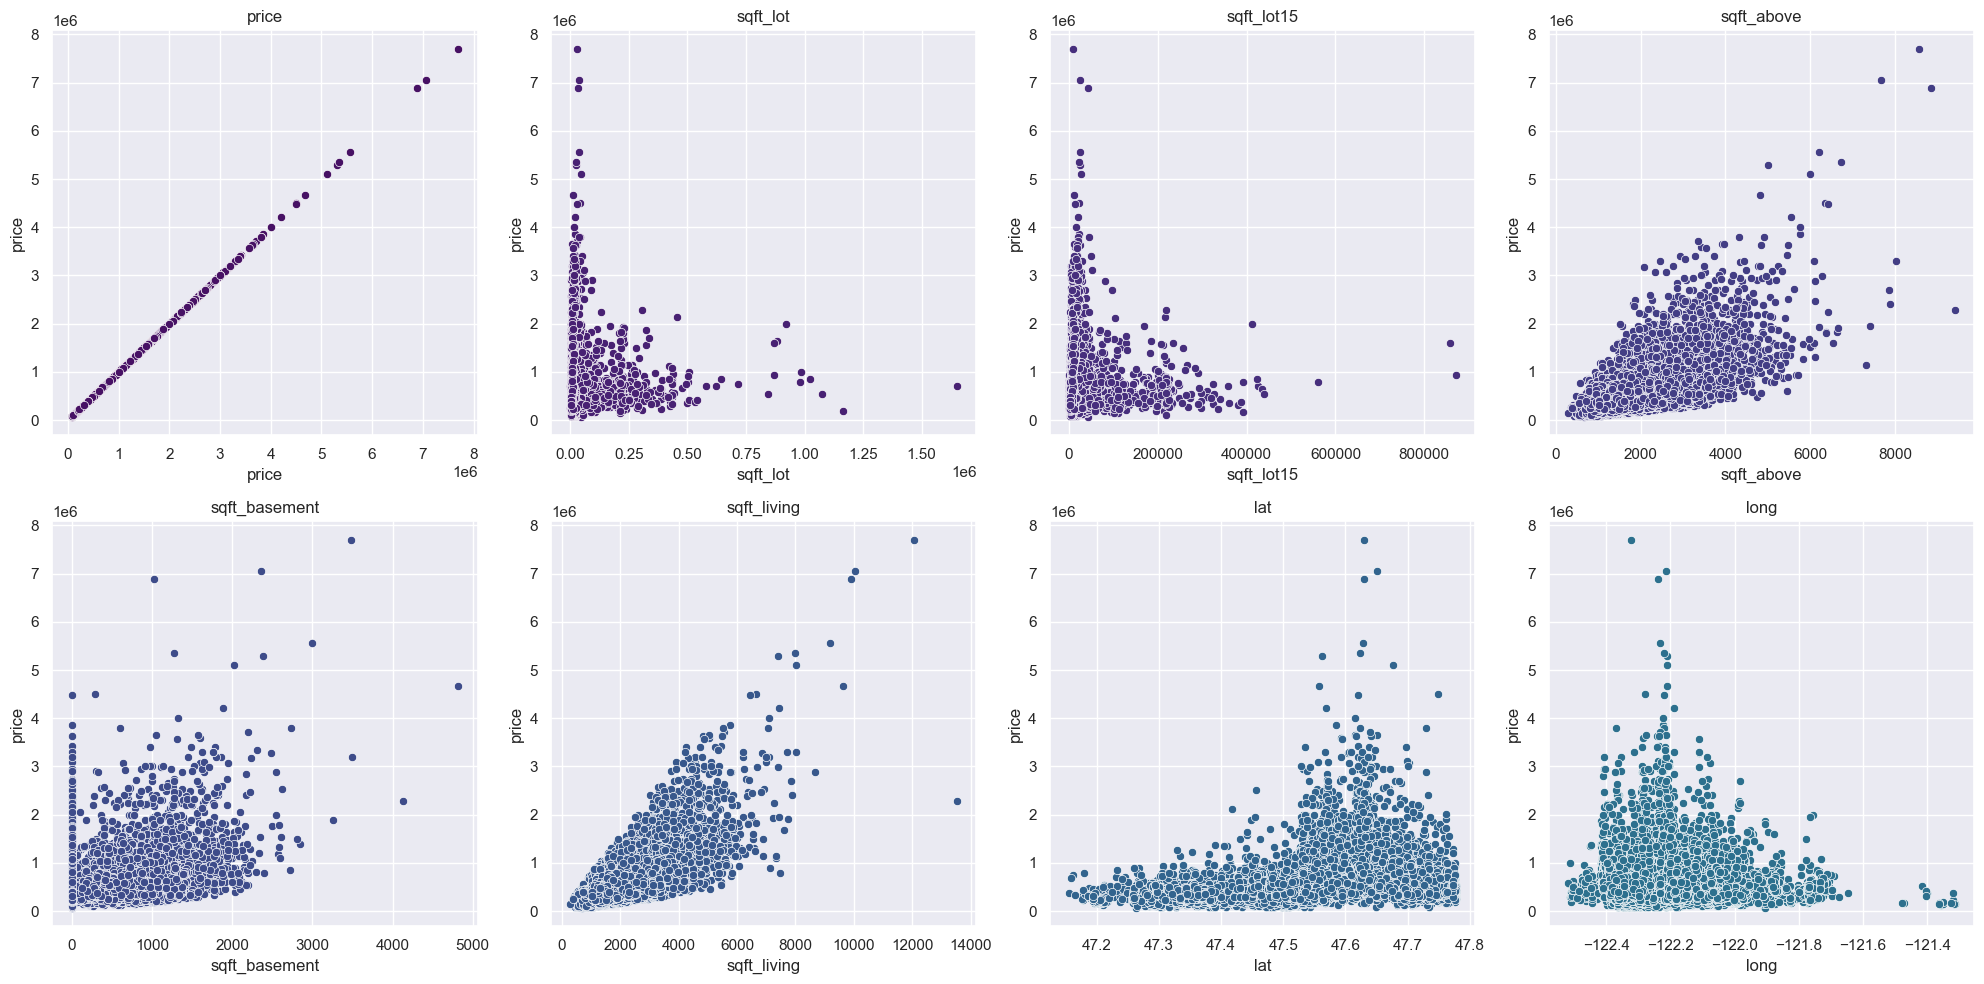

In [15]:
plots.plots_for_columns(df, continuous_columns, PlotType.SCATTER)